In [1]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Parameters
img_size = 224
batch_size = 32
epochs = 30
dataset_dir = 'PlantVillage'  # Root folder with 11 class subfolders

# Data preparation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Model setup
base_model = MobileNet(input_shape=(img_size, img_size, 3),
                       include_top=False,
                       weights='imagenet')
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs
)

# Save model
model.save('mobilenet_planville_model.h5')
print("✅ Model saved as 'mobilenet_planville_model.h5'")


Found 10636 images belonging to 11 classes.
Found 2654 images belonging to 11 classes.


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 602s 2s/step - accuracy: 0.4595 - loss: 1.6791 - val_accuracy: 0.8233 - val_loss: 0.5937
Epoch 2/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.8357 - loss: 0.5423 - val_accuracy: 0.8768 - val_loss: 0.3977
Epoch 3/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.8888 - loss: 0.3731 - val_accuracy: 0.9069 - val_loss: 0.3245
Epoch 4/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 478s 1s/step - accuracy: 0.9103 - loss: 0.3084 - val_accuracy: 0.9013 - val_loss: 0.2980
Epoch 5/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.9209 - loss: 0.2647 - val_accuracy: 0.9081 - val_loss: 0.2749
Epoch 6/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.9217 - loss: 0.2463 - val_accuracy: 0.9277 - val_loss: 0.2393
Epoch 7/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 479s 1s/step - accuracy: 0.9350 - loss: 0.2124 - val_accuracy: 0.9231 - val_loss: 0.2247
Epoch 8/30
333/333 ━━━━━━━━━━━━━━━━━━━━ 440s 1s/step - accuracy: 0.9396 - loss: 0.1957 - val_accu

✅ Model saved as 'mobilenet_planville_model.h5'


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = tf.keras.models.load_model('mobilenet_planville_model.h5')

# Load and preprocess the image
img_path = 'test.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize like training

# Predict
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Output raw prediction
print("Predicted class index:", predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class index: 6


In [3]:
class_indices = train_gen.class_indices
print(class_indices)


{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10}


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
Predicted class index: 6
Predicted class name: Tomato_Early_blight


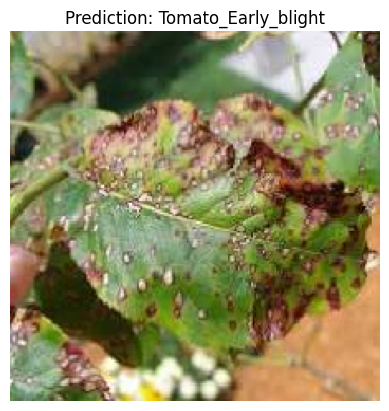

In [4]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('mobilenet_planville_model.h5')

# Load class indices from your training generator
class_indices = {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 
                 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 
                 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 
                 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 
                 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 
                 'Tomato_Spider_mites_Two_spotted_spider_mite': 10}

# Reverse the dictionary to map index -> class name
inv_class_indices = {v: k for k, v in class_indices.items()}

# Load and preprocess your test image
img_path = 'test.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize if model was trained with normalized images

# Predict the class
pred = model.predict(img_array)
predicted_index = np.argmax(pred)
predicted_class = inv_class_indices[predicted_index]

# Show result
print(f"Predicted class index: {predicted_index}")
print(f"Predicted class name: {predicted_class}")

# Optional: Show image with title
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.axis('off')
plt.show()


10% test data copied to 'test_data/'


Found 1325 images belonging to 11 classes.


C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step

--- Classification Report ---

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.97      1.00      0.99        99
                     Pepper__bell___healthy       1.00      1.00      1.00       147
                      Potato___Early_blight       1.00      0.96      0.98       100
                       Potato___Late_blight       0.97      0.98      0.98       100
                           Potato___healthy       1.00      0.87      0.93        15
                      Tomato_Bacterial_spot       0.98      0.99      0.98       212
                        Tomato_Early_blight       0.96      0.80      0.87       100
                         Tomato_Late_blight       0.94      0.98      0.96       190
                           Tomato_Leaf_Mold       0.92      0.99      0.95        95
                  Tomato_Septoria_leaf_spot       0.96      0.97      0.96   

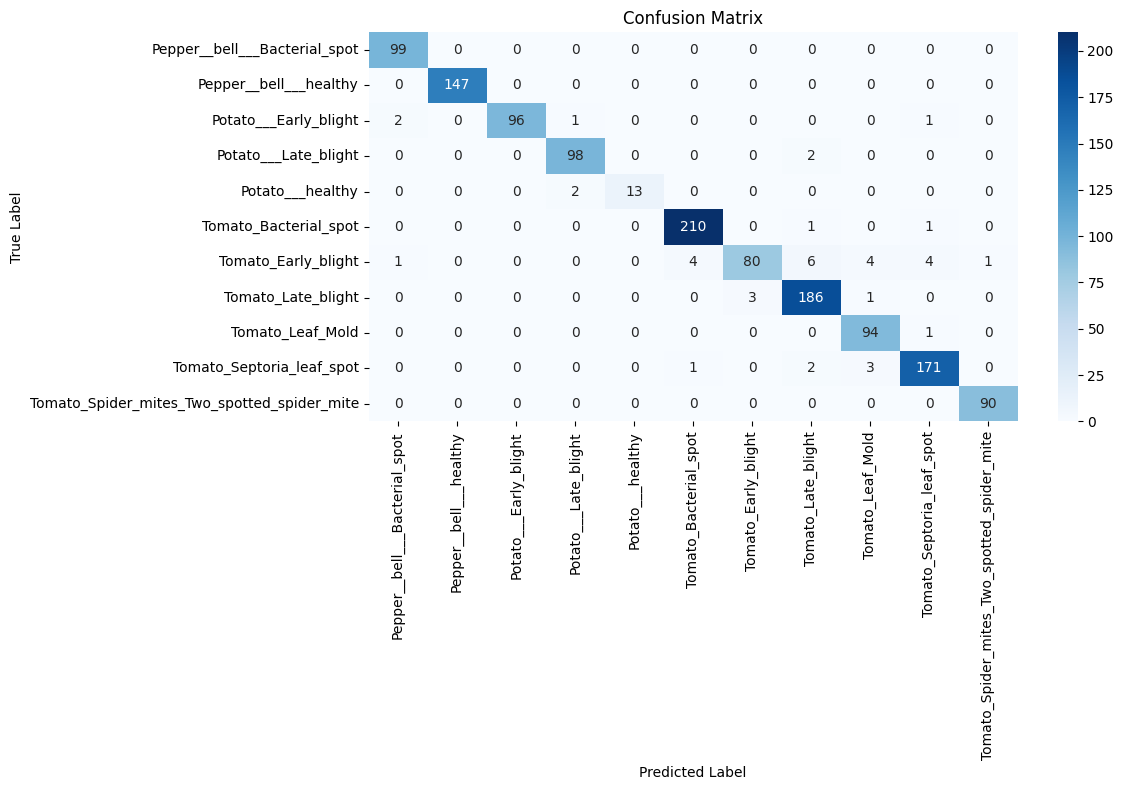

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import random

source_dir = "PlantVillage"
test_dir = "test_data"
test_split = 0.1  # 10%

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Loop through each class folder
for class_name in os.listdir(source_dir):
    class_source = os.path.join(source_dir, class_name)
    class_target = os.path.join(test_dir, class_name)

    if os.path.isdir(class_source):
        if not os.path.exists(class_target):
            os.makedirs(class_target)

        images = [f for f in os.listdir(class_source) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
        sample_size = max(1, int(len(images) * test_split))
        sampled_images = random.sample(images, sample_size)

        for img_name in sampled_images:
            src_path = os.path.join(class_source, img_name)
            dst_path = os.path.join(class_target, img_name)
            shutil.copy(src_path, dst_path)

print("10% test data copied to 'test_data/'")

model = load_model('mobilenet_planville_model.h5')

# Path to your test dataset
test_data_path = 'test_data'  # <- Make sure this folder is correctly structured

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Get true labels and predictions
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
print("\n--- Classification Report ---\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Print raw confusion matrix
print("\n--- Confusion Matrix (Raw) ---\n")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

